# Project I. Image Filtering and Hybrid Images
1. Test my_imfilter
2. Generator blured image
3. Generate hybrid image


In [1]:
import os
import skimage
from skimage.transform import rescale
import numpy as np
from numpy import pi, exp, sqrt
import matplotlib
import matplotlib.pyplot as plt
from student import vis_hybrid_image, load_image, save_image, my_imfilter, gen_hybrid_image

Project I part 1 - Tests on my_imfilter function

In [2]:
resultsDir = '..' + os.sep + 'results'
if not os.path.exists( resultsDir ):
    os.mkdir( resultsDir )

test_image = load_image('../data/cat.bmp')
print(test_image.shape)
test_image = rescale(test_image, [0.7, 0.7, 1], mode='reflect')
print(test_image.shape)

(361, 410, 3)
(253, 287, 3)


Identity filter.
This filter should do nothing regardless of the padding method you use.

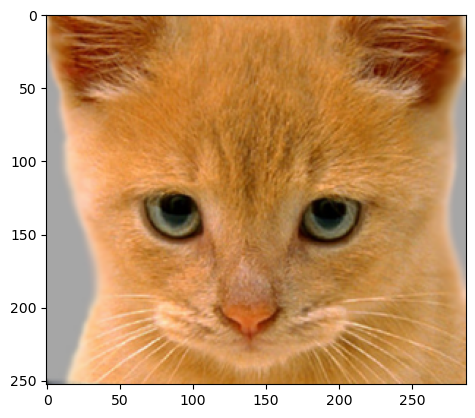

In [3]:
identity_filter = np.asarray([[0, 0, 0], [0, 1, 0], [0, 0, 0]], dtype=np.float32)
identity_image = my_imfilter(test_image, identity_filter)
plt.imshow(identity_image)
done = save_image('../results/identity_image.jpg', identity_image)

Small blur with a box filter.
This filter should remove some high frequencies.

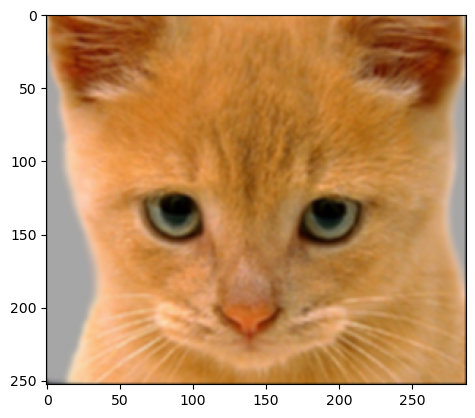

In [4]:
blur_filter = np.ones((3, 3), dtype=np.float32)
blur_filter /= np.sum(blur_filter, dtype=np.float32)  # making the filter sum to 1
blur_image = my_imfilter(test_image, blur_filter)
plt.imshow(blur_image)
done = save_image(resultsDir + os.sep + 'blur_image.jpg', blur_image)

Large blur.
This blur would be slow to do directly, so we instead use the fact that Gaussian blurs are separable and blur sequentially in each direction.

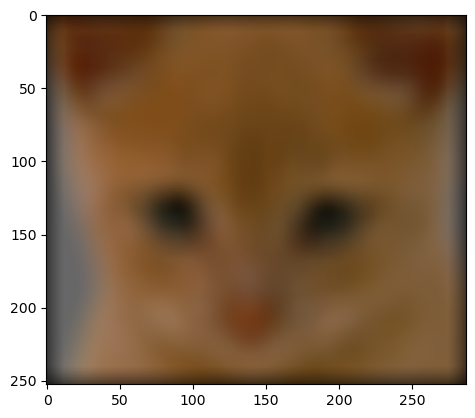

In [5]:
# generate a 1x(2k+1) gaussian kernel with mean=0 and sigma = s, see https://stackoverflow.com/questions/17190649/how-to-obtain-a-gaussian-filter-in-python
s, k = 10, 12
large_1d_blur_filter = np.asarray([exp(-z*z/(2*s*s))/sqrt(2*pi*s*s) for z in range(-k,k+1)], dtype=np.float32) 
large_1d_blur_filter = large_1d_blur_filter.reshape(-1,1)
large_blur_image = my_imfilter(test_image, large_1d_blur_filter)
# notice the T operator which transposes the filter
large_blur_image = my_imfilter(large_blur_image, large_1d_blur_filter.T)
plt.imshow(large_blur_image)
done = save_image(resultsDir + os.sep + 'large_blur_image.jpg', large_blur_image)

Oriented filter (Sobel operator)

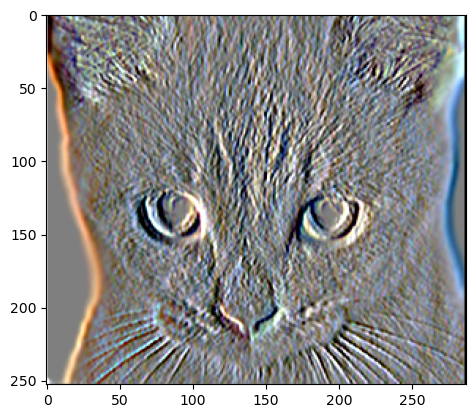

In [6]:
sobel_filter = np.asarray([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)  # should respond to horizontal gradients
sobel_image = my_imfilter(test_image, sobel_filter)

# 0.5 added because the output image is centered around zero otherwise and mostly black
sobel_image = np.clip(sobel_image+0.5, 0.0, 1.0)
plt.imshow(sobel_image)
done = save_image(resultsDir + os.sep + 'sobel_image.jpg', sobel_image)

High pass filter (discrete Laplacian)

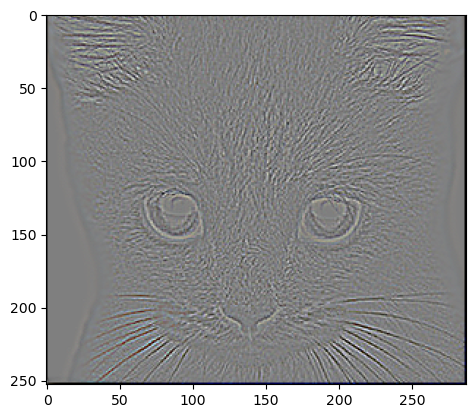

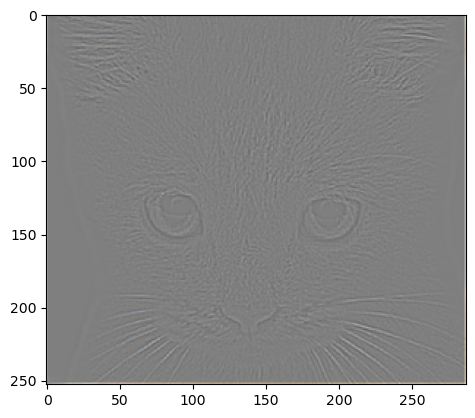

In [7]:
laplacian_filter = np.asarray([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=np.float32)
laplacian_image = my_imfilter(test_image, laplacian_filter)

# added because the output image is centered around zero otherwise and mostly black
laplacian_image = np.clip(laplacian_image+0.5, 0.0, 1.0)
plt.figure(); plt.imshow(laplacian_image)
done = save_image(resultsDir + os.sep + 'laplacian_image.jpg', laplacian_image)

# High pass "filter" alternative
high_pass_image = test_image - blur_image
high_pass_image = np.clip(high_pass_image+0.5, 0.0, 1.0)
plt.figure(); plt.imshow(high_pass_image)
done = save_image(resultsDir + os.sep + 'high_pass_image.jpg', high_pass_image)

Project I part 2 - Generate Hybrid Image

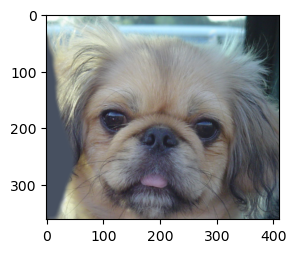

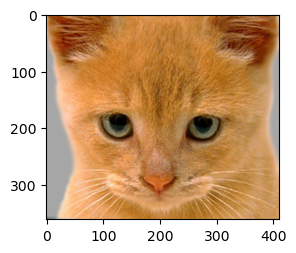

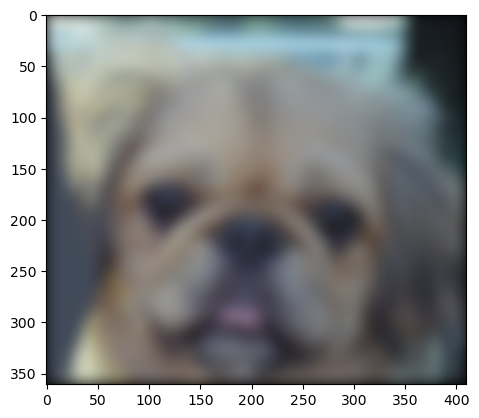

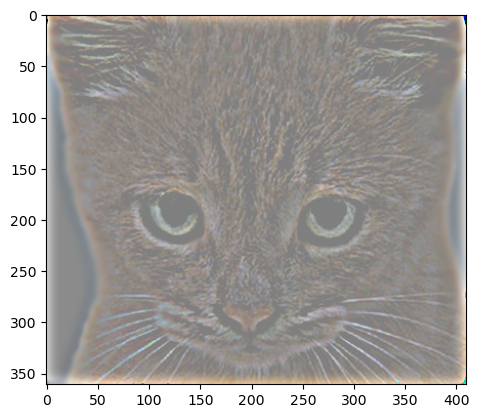

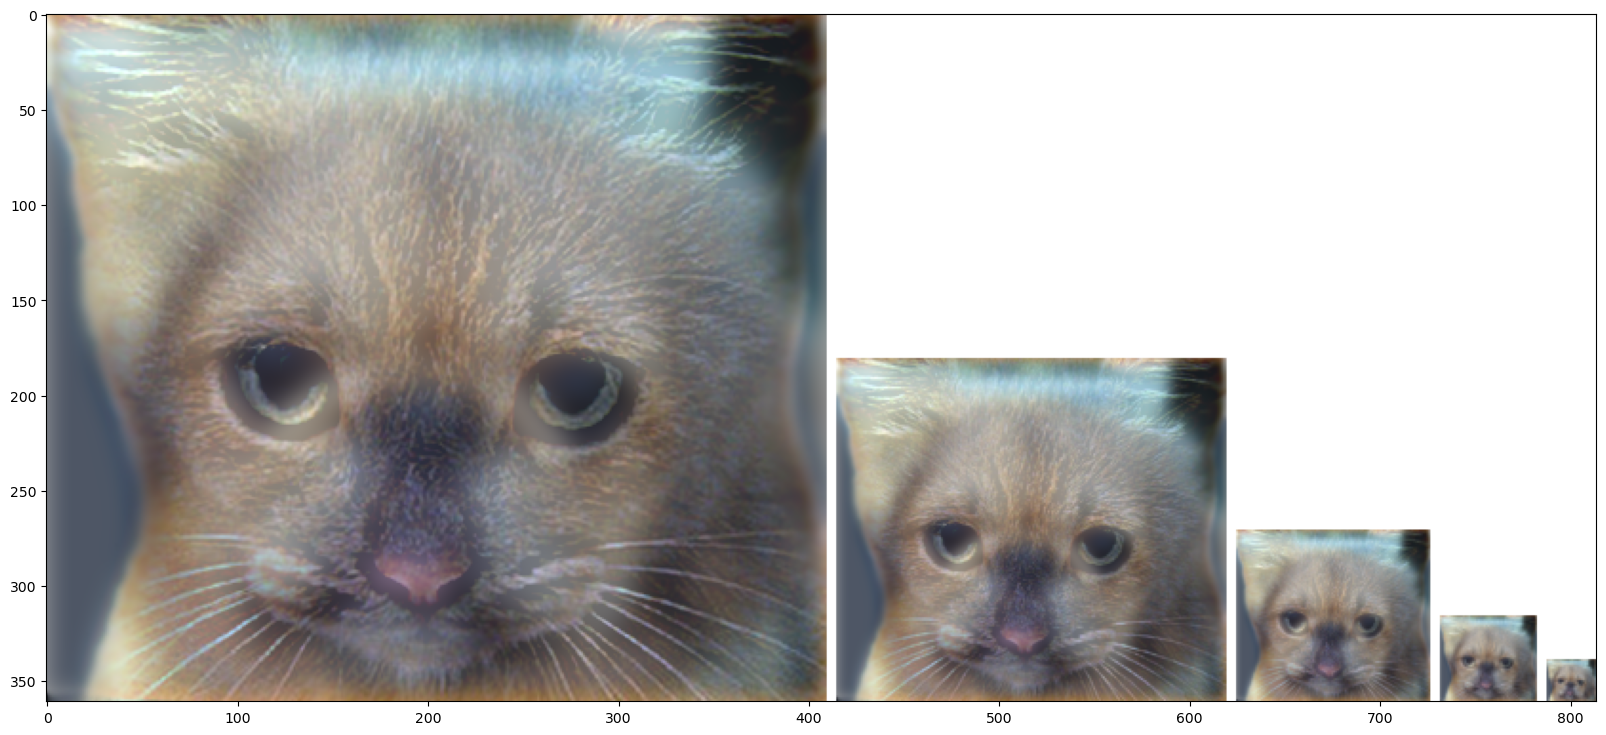

In [8]:
image1 = load_image('../data/dog.bmp')
image2 = load_image('../data/cat.bmp')

# display the dog and cat images
plt.figure(figsize=(3,3)) 
plt.imshow((image1*255).astype(np.uint8))
plt.figure(figsize=(3,3))
plt.imshow((image2*255).astype(np.uint8))
cutoff_frequency = 7
low_frequencies, high_frequencies, hybrid_image = gen_hybrid_image(image1, image2, cutoff_frequency)
## Visualize and save outputs ##
plt.figure()
plt.imshow((low_frequencies*255).astype(np.uint8))
plt.figure()
plt.imshow(((high_frequencies+0.5)*255).astype(np.uint8))
vis = vis_hybrid_image(hybrid_image)
plt.figure(figsize=(20, 20))
plt.imshow(vis)
low_frequencies = np.clip(low_frequencies, 0.0, 1.0)
high_frequencies = np.clip(high_frequencies, 0.0, 1.0)
hybrid_image = np.clip(hybrid_image, 0.0, 1.0)
vis = np.clip(vis, 0.0, 1.0)
save_image('../results/low_frequencies.jpg', low_frequencies)
save_image('../results/high_frequencies.jpg', high_frequencies)
save_image('../results/hybrid_image.jpg', hybrid_image)
save_image('../results/hybrid_image_scales.jpg', vis)